# Context

Testing cluster tracking for detection and separation of individual capillary pores.

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, uniform_filter
import pickle

In [2]:
from PIL import Image
import os
from skimage import exposure

In [3]:
import matplotlib
import matplotlib.animation
from IPython.display import HTML
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [4]:
def show_video(frames, frames1=None, n_frames = 20, startframe=0, orient = "horizontal", figsize=(10,10), vmin=0,vmax=1,cmap="viridis", show_framenumber=True):
    if type(frames1) != type(None):
        fig, ax = [None,None]
        if orient == "horizontal":
            fig, ax = plt.subplots(1,2, figsize=figsize)
        elif orient == "vertical":
            fig, ax = plt.subplots(2,1, figsize=figsize)

        time_text = None
        if show_framenumber:
            pass

        im = ax[0].imshow(frames[0], cmap = cmap, vmin=vmin,vmax=vmax)
        im1 = ax[1].imshow(frames1[0],vmin=vmin,vmax=vmax)
        ani = matplotlib.animation.FuncAnimation(fig, lambda i: [im.set_array(frames[i]),im1.set_array(frames1[i])], frames=n_frames).to_jshtml()
        return ani
    else:
        fig, ax = plt.subplots(1, figsize=(10,10))
        im = ax.imshow(frames[0], cmap = cmap, vmin=vmin,vmax=vmax)
        ani = matplotlib.animation.FuncAnimation(fig, lambda i: im.set_array(frames[i]), frames=n_frames).to_jshtml()
        return ani

### Import our custom utility methods

In [5]:
import sys
%reload_ext autoreload
%autoreload 2

In [6]:
from cluster_tracking import FastDensityClustering

In [7]:
tensor_raw = np.load("../../XRM/XRM_10min_imb_front_3.npy")

In [8]:
tensor_raw = np.swapaxes(tensor_raw,0,2)
tensor_raw = tensor_raw[:,:128,:128]
tensor_raw -= np.min(tensor_raw)
tensor_raw /= np.max(tensor_raw)

In [9]:
#for i, img in enumerate(tensor_raw):
#    tensor_raw[i] = exposure.equalize_adapthist(img)

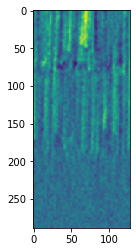

In [10]:
plt.imshow(tensor_raw[:,10,:])

In [11]:
tensor_raw -= np.min(tensor_raw)
tensor_raw /= np.max(tensor_raw)
tensor = tensor_raw<.4

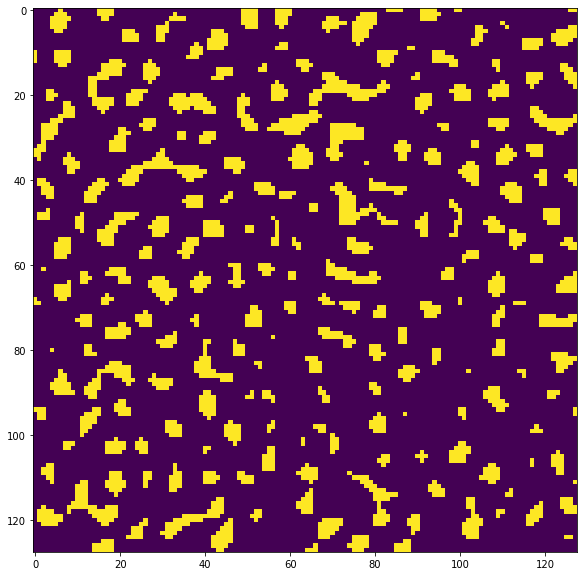

In [12]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(tensor[0])

In [13]:
smooth = np.array(tensor, dtype=np.int64)

In [14]:
smooth = gaussian_filter(np.array(tensor,dtype=np.int32)*10,[3,0,0])

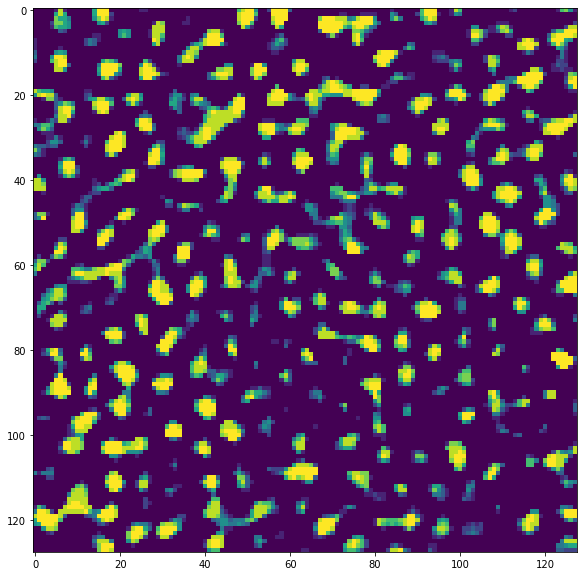

In [15]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(smooth[21])

In [16]:
labeled_tensor = FastDensityClustering.cluster_tracking(smooth, mapp=None, 
                                                        mode="closest_center", frames = 250, search_window_size=5)

.........................................................................................................................................................................................................................................................

In [17]:
np.max(labeled_tensor)

2792.0

In [92]:
size_of_cluster = np.array([np.sum(labeled_tensor==i) for i in range(int(np.max(labeled_tensor)))])

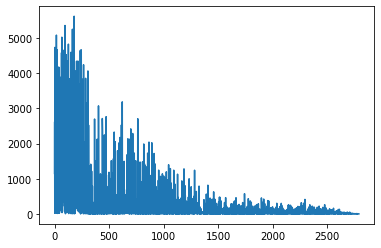

In [93]:
plt.plot(size_of_cluster)

In [95]:
np.where(size_of_cluster>2000)

(array([  1,   3,   5,  12,  16,  17,  19,  23,  24,  28,  29,  30,  32,
         33,  38,  40,  41,  46,  48,  49,  53,  54,  55,  63,  64,  66,
         67,  70,  71,  72,  74,  76,  79,  80,  81,  82,  83,  84,  85,
         86,  88,  93,  96,  97,  99, 102, 104, 105, 106, 107, 109, 110,
        112, 114, 118, 120, 122, 127, 129, 132, 133, 134, 136, 139, 141,
        142, 144, 147, 150, 151, 153, 156, 159, 162, 163, 164, 165, 170,
        171, 174, 177, 178, 180, 186, 187, 188, 195, 196, 197, 200, 201,
        202, 209, 210, 214, 215, 216, 223, 227, 231, 232, 233, 236, 240,
        242, 243, 244, 245, 247, 250, 253, 255, 256, 258, 266, 272, 285,
        294, 306, 312, 367, 391, 403, 438, 439, 440, 457, 473, 547, 552,
        555, 592, 600, 613, 621, 671, 672, 685, 699, 717, 763, 764, 866,
        892]),)

In [20]:
%%capture
fig, ax = plt.subplots(1,3)
ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")

sel = labeled_tensor== 0

im = ax[0].imshow(np.mean(sel, axis=0))
im1 = ax[1].imshow(np.mean(sel, axis=1))
im2 = ax[2].imshow(np.mean(sel, axis=2))


def display(i):
    print(".", end="")
    sel = labeled_tensor== i

    im.set_array(np.mean(sel, axis=0))
    im1.set_array(np.mean(sel, axis=1))
    im2.set_array(np.mean(sel, axis=2))

ani = matplotlib.animation.FuncAnimation(fig, display, frames=int(np.max(labeled_tensor))).to_jshtml()

In [21]:
HTML(ani)

In [22]:
np.sum(labeled_tensor == 0)

1153

In [23]:
y,x = np.where(np.mean(labeled_tensor==200, axis=0))
y_min = np.min(y)
y_max = np.max(y)
x_min = np.min(x)
x_max = np.max(x)

In [24]:
roi = labeled_tensor[:,y_min:y_max+1,x_min:x_max+1]

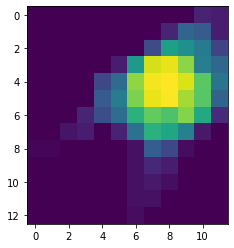

In [25]:
plt.imshow(np.mean(roi[:]==200, axis=0))

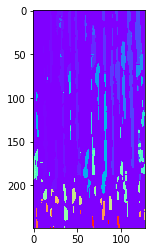

In [26]:
plt.imshow(np.median(labeled_tensor[:,:,0:5],axis=2), cmap="rainbow")

In [27]:
open("pores.html", "w").write(ani)

6226704

In [28]:
labeled_tensor = np.swapaxes(labeled_tensor,2,0)

In [29]:
roi1 = np.logical_and(labeled_tensor>0, labeled_tensor<100)

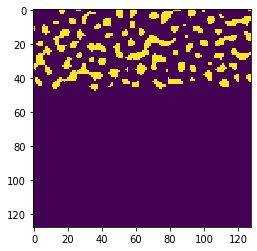

In [281]:
plt.imshow(roi1[0])

In [30]:
"""import plotly.express as px
import pandas as pd
from scipy import ndimage
def voxels_to_surface_coords(a, size=.5):
    coords = np.array(np.where(np.logical_xor(ndimage.binary_erosion(a),a).astype(np.int32))).T
    df = pd.DataFrame(coords, columns=["x","y","z"])
    size_vec = np.zeros(len(df))
    size_vec.fill(size)
    df["size"] = size_vec
    return df

fig = px.scatter_3d(voxels_to_surface_coords(roi1), 
                    x='x', y='y', z='z', size = "size", opacity=1)

fig.update_layout(
    scene = dict(
                     xaxis = dict(nticks=4, range=[0,labeled_tensor.shape[0]]),
                     yaxis = dict(nticks=4, range=[0,labeled_tensor.shape[1]]),
                     zaxis = dict(nticks=4, range=[0,labeled_tensor.shape[2]]),
    ),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))
#fig.show()"""

'import plotly.express as px\nimport pandas as pd\nfrom scipy import ndimage\ndef voxels_to_surface_coords(a, size=.5):\n    coords = np.array(np.where(np.logical_xor(ndimage.binary_erosion(a),a).astype(np.int32))).T\n    df = pd.DataFrame(coords, columns=["x","y","z"])\n    size_vec = np.zeros(len(df))\n    size_vec.fill(size)\n    df["size"] = size_vec\n    return df\n\nfig = px.scatter_3d(voxels_to_surface_coords(roi1), \n                    x=\'x\', y=\'y\', z=\'z\', size = "size", opacity=1)\n\nfig.update_layout(\n    scene = dict(\n                     xaxis = dict(nticks=4, range=[0,labeled_tensor.shape[0]]),\n                     yaxis = dict(nticks=4, range=[0,labeled_tensor.shape[1]]),\n                     zaxis = dict(nticks=4, range=[0,labeled_tensor.shape[2]]),\n    ),\n    width=700,\n    margin=dict(r=20, l=10, b=10, t=10))\n#fig.show()'

In [31]:
#fig.write_html(file="pores_points.html")

In [143]:
from plotly_voxel_plot1 import *

In [145]:
# Full pores
tensor = np.ndarray(labeled_tensor.shape, dtype=np.bool)
tensor.fill(False)
for val in np.where(size_of_cluster>1000)[0]:
    tensor[labeled_tensor == val] = 1
    
if False:
    tensor = ~tensor

In [139]:
# Empty pores
tensor = np.ndarray(labeled_tensor.shape, dtype=np.bool)
tensor.fill(False)
for val in np.where(size_of_cluster<500)[0]:
    tensor[labeled_tensor == val] = 1

In [146]:
import plotly.graph_objects as go

if False:#Small original
    tensor = labeled_tensor.copy()>0
    tensor = np.pad(tensor[:50,:50,160:160+50],1)

mesh = voxels_to_mesh(tensor, opacity=0.7, color="gray")
fig = go.Figure(mesh)

In [147]:
fig = fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=[0,tensor.shape[0]],),
                     yaxis = dict(nticks=4, range=[0,tensor.shape[1]],),
                     zaxis = dict(nticks=4, range=[0,tensor.shape[2]],),),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))

In [148]:
fig.write_html(file="pores1.html")

In [149]:
top, bottom, left, right, back, front = get_surface_voxels(np.pad(roi2,1))